# <font color = "white"><div align = "center"> Classical models </font></div>

In [48]:
import pandas as pd
import numpy as np 
import math as mt 
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
import re # library for regular expression␣operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings
import random
import seaborn as sns

# <font color = "red"><div align = "left"> Data Importation and Pre-processing</font></div>

In [49]:
training_path = "../tweet-sentiment-extraction/train.csv"
Train_df = pd.read_csv(training_path)

In [50]:
Train_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [51]:
# dropping rows with missing values

Train_df = Train_df.dropna()

In [52]:
#stopwords represnt a dictionnary (english words)

nltk.download("stopwords")
stopwords_english = stopwords.words('english')
stopwords_punctuation = string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mrabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
#Tokenization function 

def tokens(words):
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
    reduce_len=True)
    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(words)
    return tweet_tokens

# Removing Hashtags and hyperlinks

def cleaning_tweet(tweet):
    tweet2= re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)
    return tweet2

# Removing stopwords and punctuation

def remove_stopwords_punctuation(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
    return tweets_clean

# Keeping just stems for each work

def stemming(tweet_clean_tokenized):
    # Instantiate stemming class
    stemmer = PorterStemmer()
    # Create an empty list to store the stems
    tweets_stem = []
    for word in tweet_clean_tokenized:
        stem_word = stemmer.stem(word) # stemming word
        tweets_stem.append(stem_word) # append to the list
    return tweets_stem

# processing function

def process_tweet(tweet):
    clear_text = cleaning_tweet(tweet)
    tokenized = tokens(clear_text)
    clean_tweet = remove_stopwords_punctuation(tokenized)
    processed_tweet = stemming(clean_tweet)
    return processed_tweet

In [54]:
#Function for encoding sentiment :

def encoding_sentiment(sentiment):
    if sentiment == "negative":
        return -1
    if sentiment == "neutral":
        return 0
    return 1

In [55]:
#Applying this function on the training dataset


Train_df["text_clear"] = Train_df["text"].apply(process_tweet)
Train_df["selected_text_clear"] = Train_df["selected_text"].apply(process_tweet)

In [56]:
Train_df["sentiment"] = Train_df["sentiment"].apply(lambda x : encoding_sentiment(x))

Labels = Train_df["sentiment"]

Train_df = Train_df.drop(columns = ["textID","selected_text","text","selected_text_clear", "sentiment"])

Train_df

,text_clear
0,"[respond, go]"
1,"[sooo, sad, miss, san, diego]"
2,"[boss, bulli, ...]"
3,"[interview, leav, alon]"
4,"[son, put, releas, alreadi, bought]"
...,...
27476,"[wish, could, come, see, u, denver, husband, l..."
27477,"[wonder, rake, client, made, clear, net, forc,..."
27478,"[yay, good, enjoy, break, probabl, need, hecti..."
27479,[worth]


In [57]:
Labels

0        0
1       -1
2       -1
3       -1
4       -1
        ..
27476   -1
27477   -1
27478    1
27479    1
27480    0
Name: sentiment, Length: 27480, dtype: int64

In [58]:
# Splitting the data

from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature data and 'y' is your target data
X_train, X_val, y_train, y_val = train_test_split(Train_df, Labels, test_size=0.2, random_state=42)

# <font color = "red"><div align = "left"> Building the frequencies dictionnary</font></div>

In [59]:
#Building the corpus of our dataset

corpus = []
for list_words in X_train["text_clear"]:
    for word in list_words:
        if word not in corpus:
            corpus.append(word)


corpus

['oh',
 'hilari',
 'comment',
 'fact',
 'much',
 'thank',
 'tri',
 'hope',
 'bud',
 'trillin',
 'fest',
 'would',
 'honor',
 'guest',
 'hobnob',
 'show',
 'hous',
 'rock',
 'say',
 'goodby',
 'soon',
 '4:30',
 'west',
 'coast',
 'time',
 '..',
 'gettin',
 'readi',
 'catch',
 'flight',
 'back',
 'home',
 'sooo',
 'excit',
 'go',
 'two',
 'fav',
 'boyzzz',
 'puppi',
 'n',
 'bf',
 'comput',
 'slooowww',
 'morn',
 'think',
 'sign',
 'play',
 'yard',
 'lol',
 'thought',
 'suppos',
 'guess',
 'tho',
 'lolol',
 'today',
 'love',
 'day',
 'fun',
 'even',
 'moodl',
 'intro',
 'train',
 '...',
 'age',
 'sinc',
 'done',
 '2',
 'book',
 'want',
 'new',
 'lappi',
 'look',
 'like',
 'nap',
 'wait',
 'still',
 'poor',
 'guy',
 'awww',
 'boy',
 'beard',
 'manli',
 'man-',
 'via',
 'asylm',
 'congratul',
 'phil',
 'packer',
 'complet',
 'london',
 'marathon',
 'x',
 'shine',
 'exampl',
 'us',
 'u',
 'tummi',
 'feel',
 'better',
 'wors',
 'load',
 'highli',
 'qualifi',
 'stuff',
 'use',
 'snail',
 'mail

In [60]:
print(f"The corpus contains :{len(corpus)} word")

The corpus contains :18114 word


In [61]:
# Function that builds the frequency doctionnary for each pair of word and sentiment

def build_freqs(tweets, labels):

    yslist = np.squeeze(labels).tolist()
    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs


In [62]:
freqs_dict = build_freqs(X_train["text_clear"], y_train)

In [63]:
freqs_dict

{('oh', 1): 167,
 ('hilari', 1): 23,
 ('comment', 1): 12,
 ('fact', 1): 9,
 ('much', 1): 205,
 ('thank', 1): 648,
 ('tri', 1): 101,
 ('hope', 1): 436,
 ('bud', 1): 3,
 ('trillin', 1): 1,
 ('fest', 1): 2,
 ('would', 1): 163,
 ('honor', 1): 7,
 ('guest', 1): 3,
 ('hobnob', 1): 1,
 ('show', 0): 116,
 ('hous', 0): 65,
 ('rock', 0): 27,
 ('say', 0): 167,
 ('goodby', 0): 12,
 ('soon', 0): 110,
 ('4:30', 1): 3,
 ('west', 1): 5,
 ('coast', 1): 6,
 ('time', 1): 276,
 ('..', 1): 396,
 ('gettin', 1): 9,
 ('readi', 1): 51,
 ('catch', 1): 18,
 ('flight', 1): 9,
 ('back', 1): 203,
 ('home', 1): 168,
 ('sooo', 1): 78,
 ('excit', 1): 116,
 ('go', 1): 472,
 ('two', 1): 58,
 ('fav', 1): 17,
 ('boyzzz', 1): 1,
 ('puppi', 1): 8,
 ('n', 1): 39,
 ('bf', 1): 5,
 ('comput', 0): 35,
 ('slooowww', 0): 1,
 ('morn', 0): 163,
 ('think', 0): 278,
 ('sign', 0): 32,
 ('go', 0): 829,
 ('home', 0): 271,
 ('play', 0): 136,
 ('yard', 0): 7,
 ('lol', 0): 395,
 ('thought', 0): 76,
 ('suppos', 0): 28,
 ('guess', 0): 84,
 ('

In [64]:
# Now we will try to draw a report for some random words chosen from the corpus and plot its representation in the space

distinct_integers = random.sample(range(0, 18114), 10)

report_words = [corpus[i] for i in distinct_integers]

In [65]:
report_words

['hhaha',
 'eerrr',
 '30pm',
 'blaisdel',
 'out-of-focu',
 '_dahsar',
 'caramel',
 'sean',
 'metavers',
 'rachel']

In [66]:
data = []
# loop through our selected words
for word in report_words:
# initialize positive and negative counts
    pos = 0
    neg = 0
    # retrieve number of positive counts
    if (word, 1) in freqs_dict:
        pos = freqs_dict[(word, 1)]
    # retrieve number of negative counts
    if (word, -1) in freqs_dict:
        neg = freqs_dict[(word, -1)]
    # append the word counts to the table
    data.append([word, pos, neg])


data

[['hhaha', 0, 2],
 ['eerrr', 0, 0],
 ['30pm', 0, 1],
 ['blaisdel', 0, 0],
 ['out-of-focu', 0, 0],
 ['_dahsar', 1, 0],
 ['caramel', 0, 0],
 ['sean', 0, 1],
 ['metavers', 0, 0],
 ['rachel', 5, 0]]

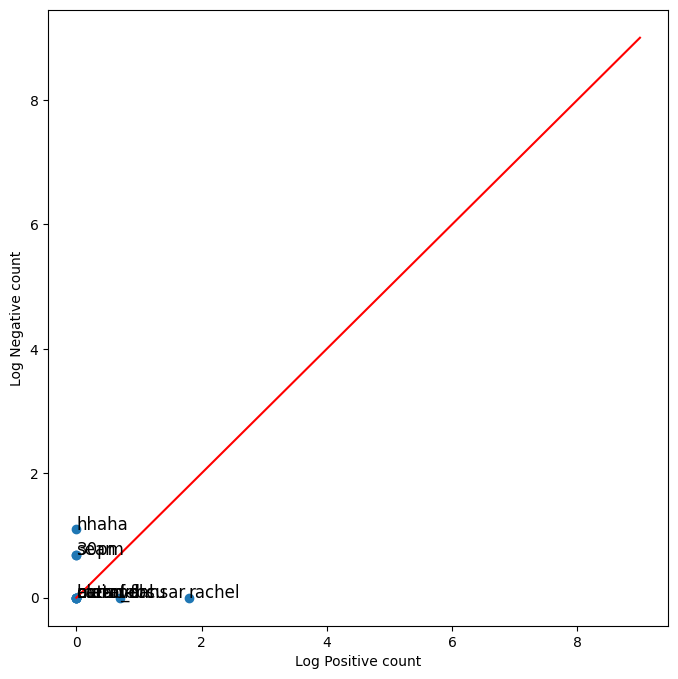

In [67]:
# Plotting the words

fig, ax = plt.subplots(figsize = (8, 8))
# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])
# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])
# Plot a dot for each pair of words
ax.scatter(x, y)
# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)
ax.plot([0, 9], [0, 9], color = 'red') 
plt.show()

# <font color = "red"><div align = "left"> Building features </font></div>

In [68]:
# Building functions that computes the features for each list of words (tokenized, clear text)


def pos_features(clear_text):
    pos = 0
    for word in clear_text:
        pos += freqs_dict.get((word,1),0)
    return pos


def neg_features(clear_text):
    neg = 0
    for word in clear_text:
        neg += freqs_dict.get((word,-1),0)
    return neg


def neu_features(clear_text):
    neu = 0
    for word in clear_text:
        neu += freqs_dict.get((word,0),0)
    return neu

In [69]:
X_train["positive_count"] = X_train["text_clear"].apply(pos_features)

X_train["negative_count"] = X_train["text_clear"].apply(neg_features)

X_train["neutral_count"]  = X_train["text_clear"].apply(neu_features)

In [70]:
X_train.head()

,text_clear,positive_count,negative_count,neutral_count
21209,"[oh, hilari, comment, fact, much]",416,393,379
18265,"[thank, tri, hope, bud, trillin, fest, would, ...",1365,304,598
9684,"[show, hous, rock, say, goodby, soon]",452,294,497
9689,"[4:30, west, coast, time, .., gettin, readi, c...",2537,2457,3557
22728,"[comput, slooowww, morn, think, sign, go, home...",1171,1138,1752


In [71]:
X_val["positive_count"] = X_val["text_clear"].apply(pos_features)

X_val["negative_count"] = X_val["text_clear"].apply(neg_features)

X_val["neutral_count"]  = X_val["text_clear"].apply(neu_features)

In [72]:
X_val.head()

,text_clear,positive_count,negative_count,neutral_count
1589,"[enjoy, famili, trump, everyth]",229,67,108
10414,"[kinda, turn, buy, dig, deeper, hole, etc]",73,114,161
6562,"[clive, birthday, pat]",80,15,40
2603,"[congrat, hey]",121,26,131
4004,[text],16,22,30


In [73]:
Training_final_data = X_train.drop(columns= ["text_clear"])

Validation_final_data = X_val.drop(columns=["text_clear"])

## <font color = "white"><div align = "left"> Let see to what extent our data is linearly separable, with respect to the positive and negative count </font></div>

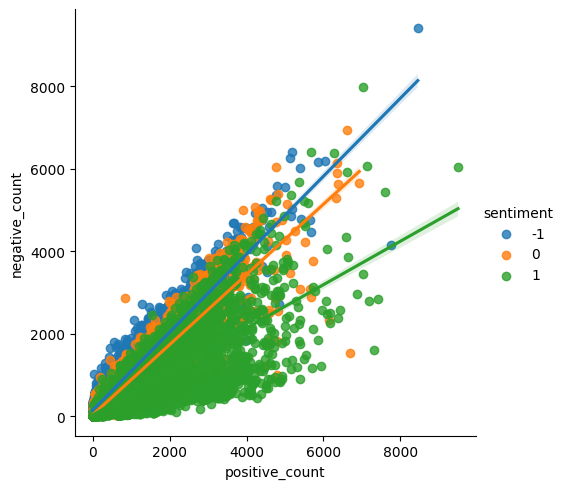

In [74]:
sns.lmplot(x="positive_count", y="negative_count", hue= "sentiment",data= pd.concat([X_train,y_train],axis= 1))

<AxesSubplot: xlabel='negative_count', ylabel='positive_count'>

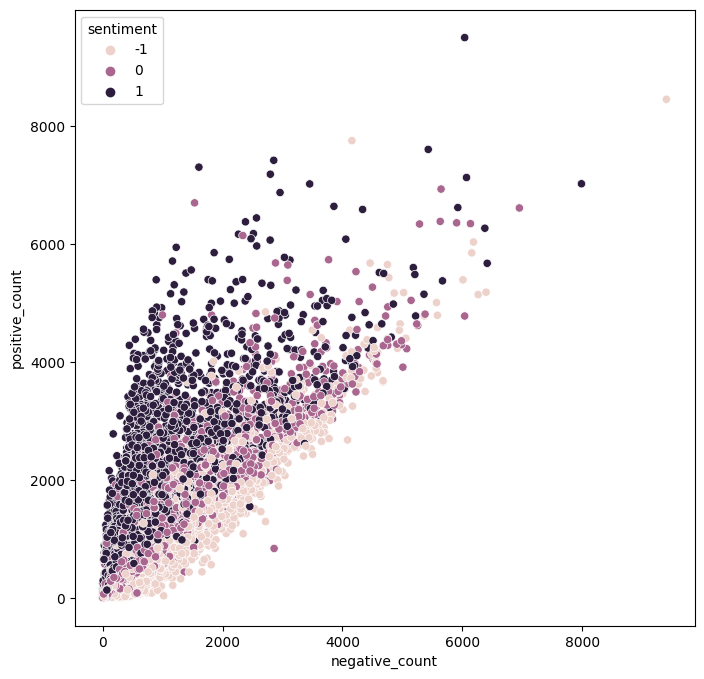

In [75]:
data = pd.concat([X_train, y_train], axis= 1)

plt.figure(figsize = (8,8))

sns.scatterplot(x= data["negative_count"], y=data["positive_count"], hue= data["sentiment"])

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sentiment', ylabel='negative_count'>

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


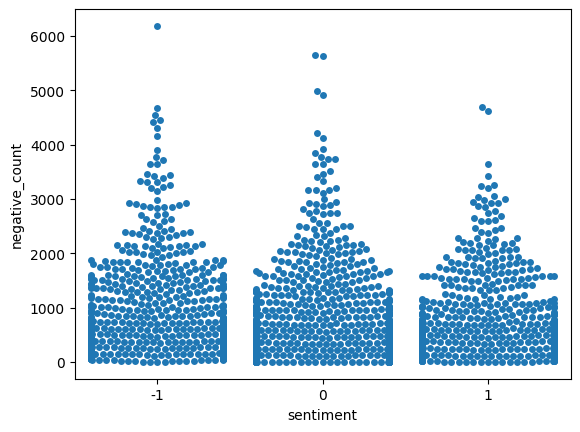

In [76]:
sns.swarmplot(x="sentiment", y="negative_count",data= data.sample(frac = 0.1))

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sentiment', ylabel='positive_count'>

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


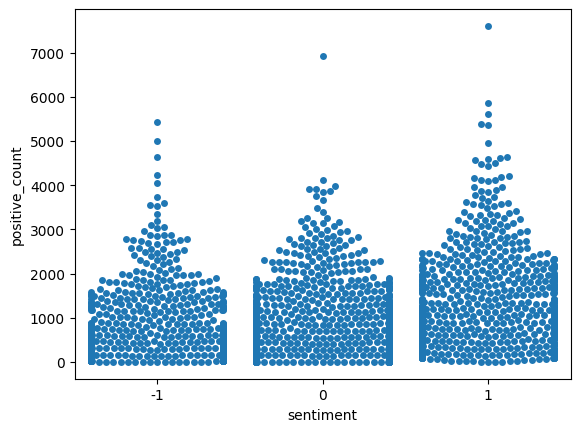

In [77]:
sns.swarmplot(x="sentiment", y="positive_count",data= data.sample(frac = 0.1))

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='sentiment', ylabel='neutral_count'>

c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mrabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


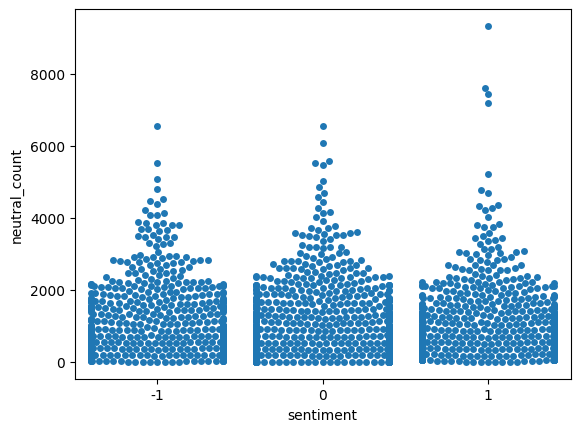

In [78]:
sns.swarmplot(x="sentiment", y="neutral_count",data= data.sample(frac = 0.1))

### <font color = white><div align = center> It's obvious that positive_count, neither negative_count nor neutral_count can separate from the different classes</font></div>

### <font color = "white"><div align = "center"> It's clear that the data is not linearly separable since we see all points gathered, near each other, even if there are multiple classes </font></div>

## <font color = "white"><div align = "center"> Although these features aren't very relevant and discriminatory, we will implement some classic models and analyze their performance </font></div>

# <font color = "red"><div align = "center"> Building our linear regression model </font></div>

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
# Create a linear regression model

linear_regresssion_model = LinearRegression()

# Fitting the model 

linear_regresssion_model.fit(Training_final_data,y_train)



LinearRegression()

In [81]:
# Function for applying treshold

def treshold(min,max,prediction):
    if prediction < min:
        return -1
    if prediction > max:
        return 1
    return 0

In [82]:
# Applying the treshold on our predictions

y_pred = linear_regresssion_model.predict(Validation_final_data)

y_pred_sentiment = np.vectorize(lambda x: treshold(-0.35,0.25,x))(y_pred)

In [83]:
y_pred

array([ 0.01499461, -0.08954317, -0.03459672, ..., -0.00676977,
       -0.23236548, -0.13703298])

In [84]:
y_pred_sentiment.size

5496

In [85]:
# Computing the accuracy

m = y_pred_sentiment.size

y_val_arr = np.array(y_val)

accuracy = np.sum(y_pred_sentiment == y_val_arr)/m

accuracy

0.5773289665211062

In [86]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_val_arr, y_pred_sentiment)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 485  979  108]
 [ 127 1835  274]
 [  31  804  853]]


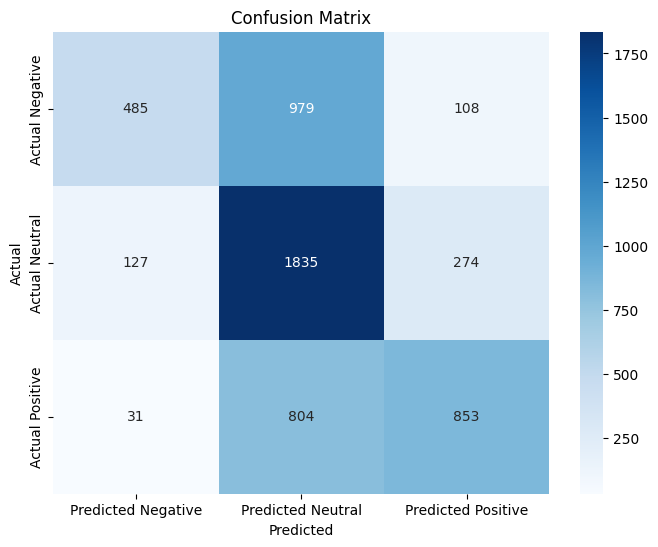

In [116]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Neutral", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Neutral","Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [88]:
from sklearn.metrics import classification_report
# General report of our model 

report = classification_report(y_val_arr, y_pred_sentiment)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.31      0.44      1572
           0       0.51      0.82      0.63      2236
           1       0.69      0.51      0.58      1688

    accuracy                           0.58      5496
   macro avg       0.65      0.54      0.55      5496
weighted avg       0.63      0.58      0.56      5496



# <font color = "red"><div align = "center"> Building our polynomial regression model </font></div>

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# Create polynomial features (e.g., quadratic features)

degree = 2  # Change this to fit the desired degree

polynomial_features = PolynomialFeatures(degree=degree)

X_poly_training = polynomial_features.fit_transform(Training_final_data)

X_poly_val = polynomial_features.fit_transform(Validation_final_data)

In [91]:
X_poly_training[0]

array([1.00000e+00, 4.16000e+02, 3.93000e+02, 3.79000e+02, 1.73056e+05,
       1.63488e+05, 1.57664e+05, 1.54449e+05, 1.48947e+05, 1.43641e+05])

In [92]:
# Fit a polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly_training, y_train)

LinearRegression()

In [93]:
# Applying the treshold on our predictions

y_pred_poly = model_poly.predict(X_poly_val)

y_pred_sentiment_poly = np.vectorize(lambda x: treshold(-0.5,0.5,x))(y_pred)

In [94]:
y_pred_poly

array([ 0.07792305, -0.12387642, -0.01153564, ..., -0.05217031,
       -0.322322  , -0.20312686])

In [95]:
# Computing the accuracy

m = y_pred_sentiment_poly.size

y_val_arr = np.array(y_val)

accuracy = np.sum(y_pred_sentiment_poly == y_val_arr)/m

accuracy

0.5194687045123726

In [96]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix_poly = confusion_matrix(y_val_arr, y_pred_sentiment_poly)

print("Confusion Matrix:")
print(conf_matrix_poly)

Confusion Matrix:
[[ 285 1267   20]
 [  57 2101   78]
 [  10 1209  469]]


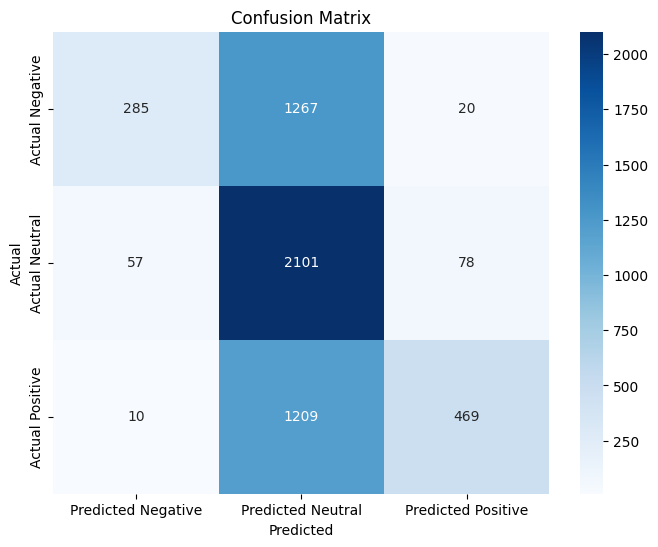

In [117]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Neutral", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Neutral","Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [97]:
from sklearn.metrics import classification_report
# General report of our model 

report_poly = classification_report(y_val_arr, y_pred_sentiment_poly)
print("Classification Report:")
print(report_poly)

Classification Report:
              precision    recall  f1-score   support

          -1       0.81      0.18      0.30      1572
           0       0.46      0.94      0.62      2236
           1       0.83      0.28      0.42      1688

    accuracy                           0.52      5496
   macro avg       0.70      0.47      0.44      5496
weighted avg       0.67      0.52      0.46      5496



## It's obvious that the polynomial features didn't bring much to the classification task, since the accuracies are overall the same as the normal linear regression model

# <font color = "red"><div align = "center"> Building our random forest model </font></div>

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)  

# Fit the model to the training data
rf_classifier.fit(Training_final_data, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [100]:
# Make predictions on the test data
y_pred_rf = rf_classifier.predict(Validation_final_data)


In [101]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_rf = accuracy_score(y_val_arr, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.5920669577874818


In [102]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_val_arr, y_pred_rf)

print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[ 895  491  186]
 [ 510 1323  403]
 [ 178  474 1036]]


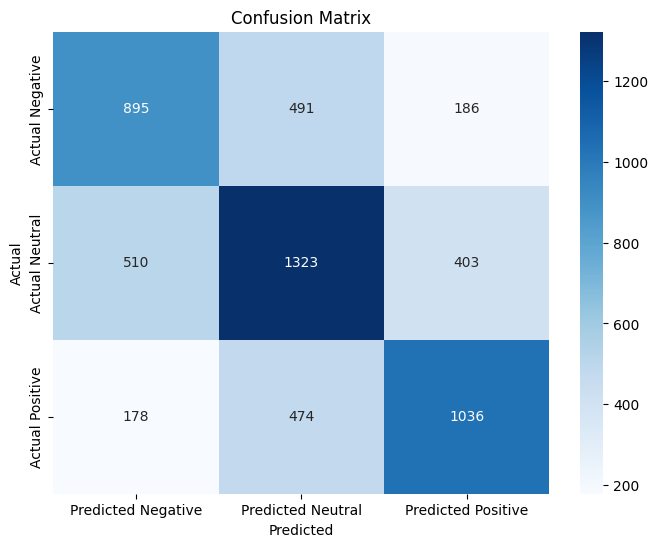

In [118]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Neutral", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Neutral","Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [103]:
# General report of our model 

report_rf = classification_report(y_val_arr, y_pred_rf)
print("Classification Report:")
print(report_rf)

Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.57      0.57      1572
           0       0.58      0.59      0.58      2236
           1       0.64      0.61      0.63      1688

    accuracy                           0.59      5496
   macro avg       0.59      0.59      0.59      5496
weighted avg       0.59      0.59      0.59      5496



# We observe that the accuracy is higher than before, but this model misclassifies more the pos and neg classes {-1,1}, than the regression model, but it classifies better the neutral model.
# I've tried to use some class_weight to see if it makes the results better, it didn't bring much to the accuracy

# <font color = "red"><div align = "center"> Building our XGBoost model </font></div>

In [104]:
import xgboost as xgb

In [105]:
# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=50, learning_rate=0.2, random_state=42)  # You can adjust hyperparameters

# Map class labels to sequential integer labels
# XGBoost expects classes to start from 0
class_mapping = {-1: 0, 0: 1, 1: 2}
y_mapped = np.array([class_mapping[label] for label in y_train])

# Fit the model to the training data
xgb_model.fit(Training_final_data, y_mapped)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [106]:
y_pred_xgb = xgb_model.predict(Validation_final_data)

y_val_mapped = np.array([class_mapping[label] for label in y_val])

In [107]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_xgb = accuracy_score(y_val_mapped, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.6257278020378457


In [108]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix_xgb = confusion_matrix(y_val_mapped, y_pred_xgb)

print("Confusion Matrix:")
print(conf_matrix_xgb)

Confusion Matrix:
[[ 796  595  181]
 [ 329 1500  407]
 [  89  456 1143]]


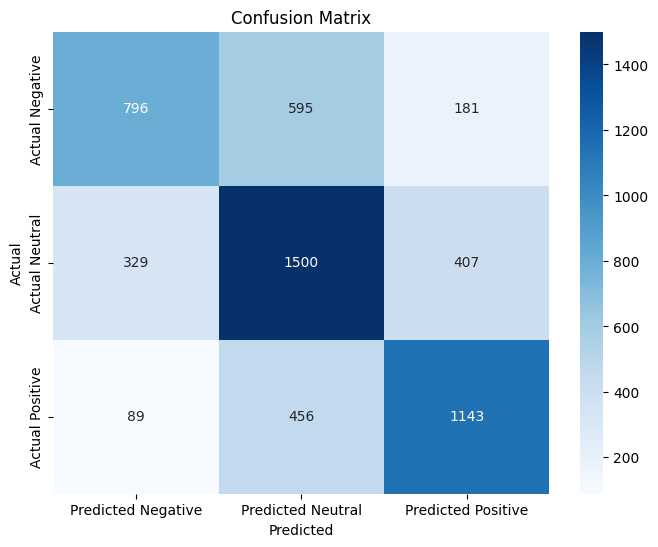

In [119]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Neutral", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Neutral","Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [109]:
# General report of our model 

report_xgb = classification_report(y_val_mapped, y_pred_xgb)
print("Classification Report:")
print(report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.51      0.57      1572
           1       0.59      0.67      0.63      2236
           2       0.66      0.68      0.67      1688

    accuracy                           0.63      5496
   macro avg       0.63      0.62      0.62      5496
weighted avg       0.63      0.63      0.62      5496



# This model is better than the previous one, it was expected since XGBoost ususally well than other models, since it penalizes the weak learner and it penalizes the previous errors

# <font color = "red"><div align = "center"> Building our KNN model </font></div>

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
# Create a KNN classifier
k_neighbors = 50  # You can adjust the number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

# Fit the model to the training data
knn_classifier.fit(Training_final_data, y_train)


KNeighborsClassifier(n_neighbors=50)

In [112]:
# Make predictions on the test data
y_pred_knn = knn_classifier.predict(Validation_final_data)


In [113]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_knn = accuracy_score(y_val_arr, y_pred_knn)
print("Accuracy:", accuracy_knn)

Accuracy: 0.6308224163027657


In [114]:
conf_matrix_knn = confusion_matrix(y_val_arr, y_pred_knn)

print("Confusion matrix :")
conf_matrix_knn

Confusion matrix :


array([[ 784,  631,  157],
       [ 301, 1544,  391],
       [  74,  475, 1139]], dtype=int64)

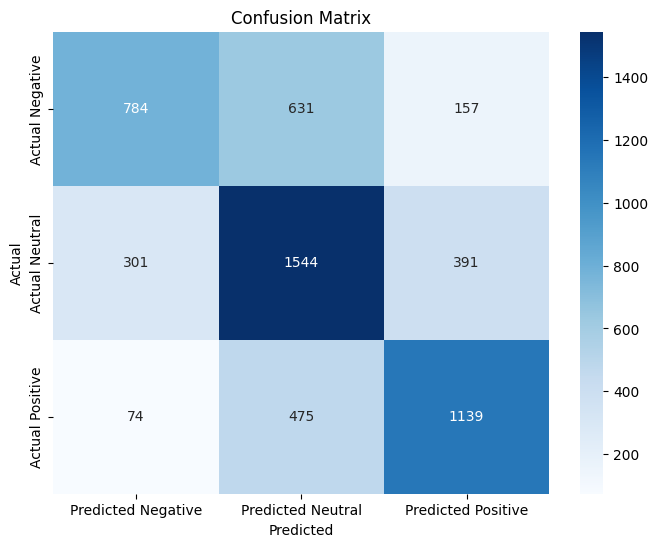

In [120]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Neutral", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Neutral","Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [115]:
# General report of our model 

report_knn = classification_report(y_val_arr, y_pred_knn)
print("Classification Report:")
print(report_knn)

Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.50      0.57      1572
           0       0.58      0.69      0.63      2236
           1       0.68      0.67      0.67      1688

    accuracy                           0.63      5496
   macro avg       0.64      0.62      0.63      5496
weighted avg       0.64      0.63      0.63      5496



# In terms of accuracy, the knn model was better, it's logic since the data has only 3 features, the distance still has a meaning
# The model is still not good enough.
# <font color = red> It's clear that the main reason is that our features aren't powerful enough to make the models separate different classes</font>
# I will try some more sophisticated models, with more relevant features to enhance the performance of the classifier